In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [138]:
df = pd.read_csv("train.csv")
df.head(3)

,date,high,low,momentum_index,beta_indicator,risk_premium,index,volatility_factor,technical_score,oscillator_value,liquidity_ratio,open,quant_index,trend_strength,market_sentiment,close,volume,alpha_signal,symbols
0,22-06-2012,24.797176,162.793195,153.349972,90.290064,277.383362,62235.0,105.868473,128.280484,38.359969,154.844720,122.656593,3817.034814,-48.017571,-42.552169,95.610001,NaN,126.405476,MRO
1,27-02-2013,84.148858,62.911473,123.066279,99.689780,116.635811,48784.0,116.700703,8.730951,-35.866296,-53.482145,48.429243,4522.962303,149.657066,221.824044,27.410000,24383100.0,-22.111984,HRS
2,19-07-2010,162.714072,7.813419,50.140068,-30.373609,145.254747,233118.0,302.752221,-40.118103,-50.358825,27.921367,144.410310,1277.720791,284.891018,58.834733,25.230000,38181800.0,20.068656,Low


In [9]:
df.describe()

,high,low,momentum_index,beta_indicator,risk_premium,index,volatility_factor,technical_score,oscillator_value,liquidity_ratio,open,quant_index,trend_strength,market_sentiment,close,volume,alpha_signal
count,281545.000000,281619.000000,281630.000000,281646.000000,281524.000000,281564.000000,281566.000000,281571.000000,281620.000000,281572.000000,281645.000000,281513.000000,281592.000000,281615.000000,281575.000000,2.815950e+05,281630.000000
mean,65.471554,63.596480,64.564607,64.775102,64.674438,130375.355411,64.239363,64.519412,64.595450,64.619528,64.495704,2980.293075,64.658411,64.551143,64.593765,5.362979e+06,64.809600
std,105.372314,148.657652,139.648416,102.043032,128.761073,76062.359993,159.356164,110.775949,109.205186,97.931248,139.549619,1170.837088,113.036629,149.412900,75.083946,1.241748e+07,95.027108
min,-248.595211,-441.915389,-590.821649,-295.499896,-461.388152,0.000000,-634.445183,-428.346526,-331.347102,-254.426914,-345.856216,-2209.348265,-410.976900,-516.138839,0.000000,0.000000e+00,-341.135559
25%,4.949619,-22.373048,-28.586738,3.940734,-16.303281,64467.750000,-41.249252,-8.580788,-0.800728,7.073625,-12.550866,2202.589293,-10.380741,-32.029153,31.049999,1.203350e+06,0.925439
50%,55.525648,50.299441,62.298848,56.472462,57.968471,130412.500000,61.228377,62.049777,56.833001,55.948308,49.784563,2987.024005,63.046713,58.519235,48.349998,2.453100e+06,62.506265
75%,109.181108,129.475177,156.472517,111.662049,136.338476,196257.250000,167.444306,135.314810,118.581329,107.573101,119.038461,3767.902080,138.456172,152.725735,74.930000,5.184700e+06,124.761578
max,1746.780919,2394.032714,1058.179904,1728.026652,1663.826539,262116.000000,1416.440492,940.290870,1679.709737,1611.081692,2467.724237,8373.407009,808.423384,1737.572814,1578.130005,6.551166e+08,949.966352


In [139]:
# Removing features that are not usefull
df = df.drop(columns=["date","momentum_index","index","quant_index"])

In [4]:
# First finding null values
df.isnull().sum()

high                 1540
low                  1466
beta_indicator       1439
risk_premium         1561
volatility_factor    1519
technical_score      1514
oscillator_value     1465
liquidity_ratio      1513
open                 1440
trend_strength       1493
market_sentiment     1470
close                1510
volume               1490
alpha_signal         1455
symbols                 0
dtype: int64

In [15]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283085 entries, 0 to 283084
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   high               281545 non-null  float64
 1   low                281619 non-null  float64
 2   beta_indicator     281646 non-null  float64
 3   risk_premium       281524 non-null  float64
 4   volatility_factor  281566 non-null  float64
 5   technical_score    281571 non-null  float64
 6   oscillator_value   281620 non-null  float64
 7   liquidity_ratio    281572 non-null  float64
 8   open               281645 non-null  float64
 9   trend_strength     281592 non-null  float64
 10  market_sentiment   281615 non-null  float64
 11  close              281575 non-null  float64
 12  volume             281595 non-null  float64
 13  alpha_signal       281630 non-null  float64
 14  symbols            283085 non-null  object 
dtypes: float64(14), object(1)
memory usage: 32.4+ MB


In [140]:
# Filling numerical columns with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
# and categorical with mode
df['symbols'] = df['symbols'].fillna(df['symbols'].mode()[0])

In [141]:
# Applying one hot encoding for symbols column
df['symbols'].unique()

array(['MRO', 'HRS', 'Low', 'ULTA'], dtype=object)

In [142]:
df = pd.get_dummies(df,columns=["symbols"],drop_first=True,dtype='int8')

### Correlation matrix

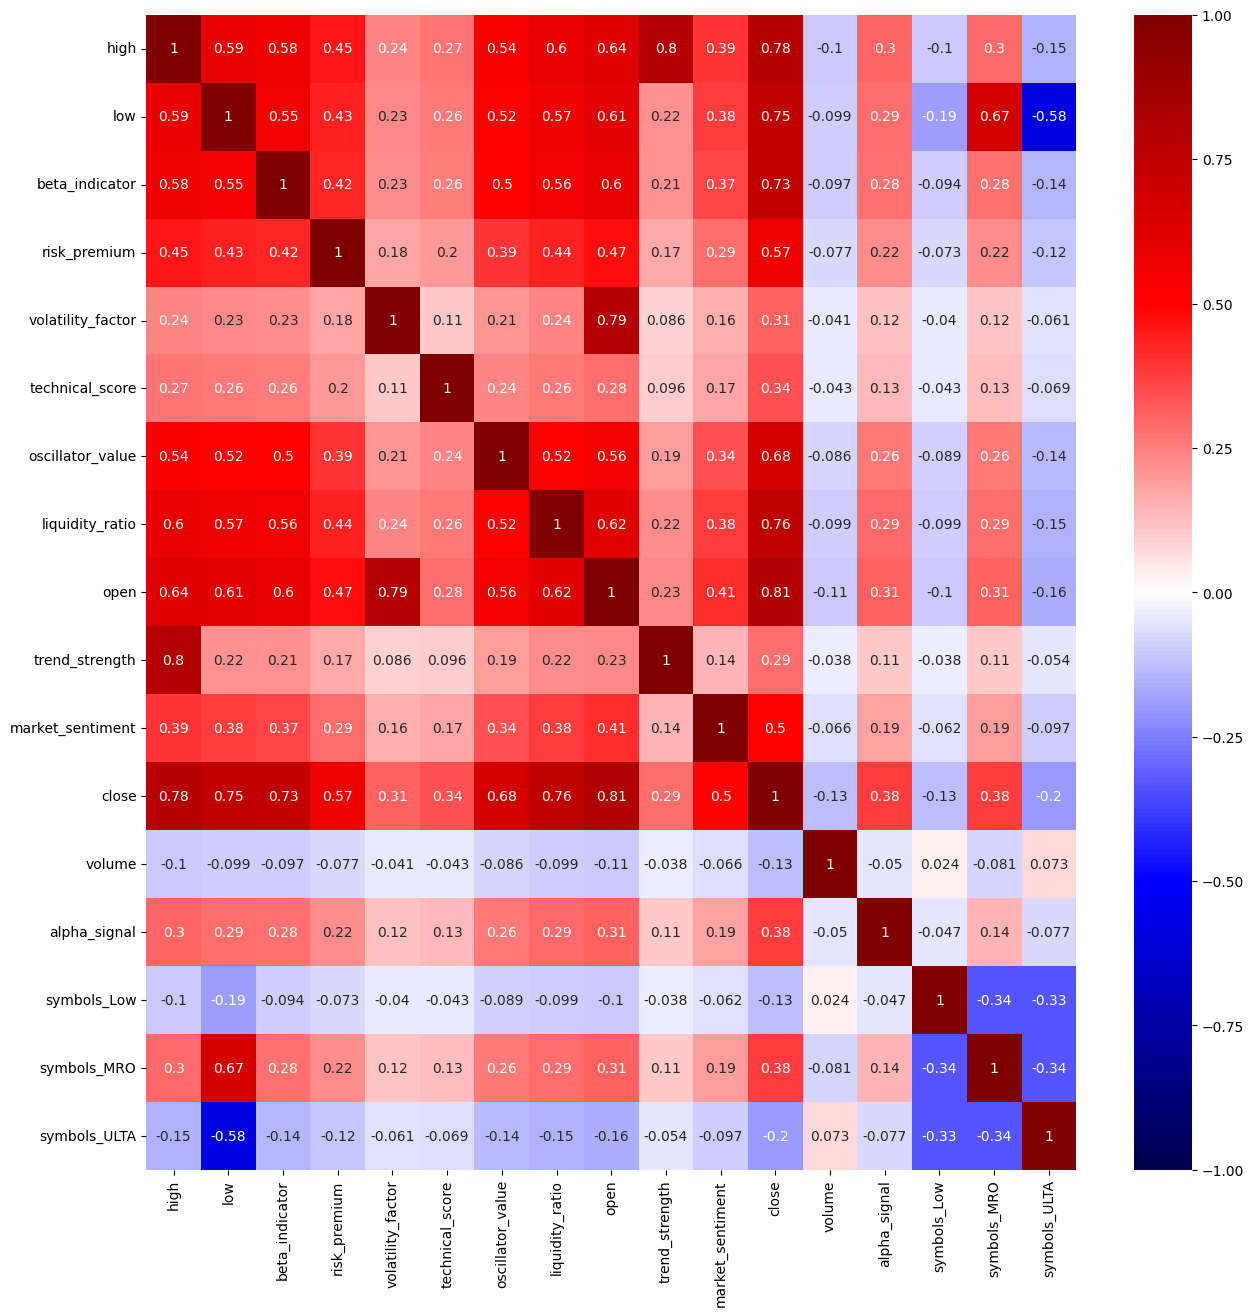

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap="seismic",center=0,vmin=-1, vmax=1)
plt.show()

In [143]:
# from here we can see that in - volume,symbhols_Low and symbols_ULTA - very less correlation...
# Thus excluding these
df = df.drop(columns=["volume", "symbols_Low", "symbols_ULTA"])

In [144]:
# Applying z-score Normalization
cols = df.drop(columns=["close"]).columns
train_mean = df[cols].mean()
train_std = df[cols].std()
df[cols] = (df[cols] - train_mean) / train_std

In [145]:
df.head(3)

,high,low,beta_indicator,risk_premium,volatility_factor,technical_score,oscillator_value,liquidity_ratio,open,trend_strength,market_sentiment,close,alpha_signal,symbols_MRO
0,-0.386536,0.669468,0.251090,1.656815,0.262038,0.577250,-0.240492,0.924239,0.418366,-0.999373,-0.718483,95.610001,0.649989,1.714288
1,0.178245,-0.004155,0.343438,0.404951,0.330196,-0.504847,-0.921944,-1.208701,-0.114884,0.754023,1.055555,27.410000,-0.916937,-0.583331
2,0.925860,-0.375748,-0.934386,0.627829,1.500860,-0.947002,-1.054997,-0.375257,0.574644,1.953562,-0.038149,25.230000,-0.471912,-0.583331


### Applying same procedure for testing data

In [146]:
df_test = pd.read_csv("test.csv")
df_test.head(3)

,index,date,technical_score,liquidity_ratio,trend_strength,risk_premium,alpha_signal,oscillator_value,open,market_sentiment,close,low,volatility_factor,momentum_index,beta_indicator,high,volume,quant_index,symbols
0,143773.0,2015-02-17,106.424626,137.662028,225.081817,-104.681756,52.049226,-49.953411,-11.284320,133.711633,42.099998,9.341813,-11.289493,-17.097228,39.243436,106.520498,9040600.0,3541.208719,Low
1,161481.0,2012-09-20,52.349283,51.568673,-200.005916,-137.976329,95.471376,103.608070,172.322151,63.263396,102.639999,119.482832,162.895026,111.348426,118.035955,-1.941571,1356100.0,1934.283874,HRS
2,98533.0,2011-05-04,199.923028,319.395144,2.539481,-15.303539,27.533335,164.874545,5.420504,170.496216,46.150002,29.394771,6.884014,24.395089,15.830905,20.636255,6866500.0,1067.178832,Low


In [147]:
df_test = df_test.drop(columns=["date","momentum_index","index","quant_index"])
num_cols = df_test.select_dtypes(include=['float64', 'int64']).columns
df_test[num_cols] =df_test[num_cols].fillna(df_test[num_cols].median())
df_test['symbols'] = df_test['symbols'].fillna(df_test['symbols'].mode()[0])
df_test = pd.get_dummies(df_test,columns=["symbols"],drop_first=True,dtype='int8')
df_test = df_test.drop(columns=["volume", "symbols_Low", "symbols_ULTA"])
df_test[cols] = (df_test[cols] - train_mean)/train_std

In [148]:
df_test.head(3)

,technical_score,liquidity_ratio,trend_strength,risk_premium,alpha_signal,oscillator_value,open,market_sentiment,close,low,volatility_factor,beta_indicator,high,symbols_MRO
0,0.379423,0.748315,1.423048,-1.318618,-0.134503,-1.051275,-0.543866,0.464296,42.099998,-0.365441,-0.475137,-0.250424,0.391130,-0.583331
1,-0.110038,-0.133146,-2.347525,-1.577909,0.323620,0.358534,0.775163,-0.008431,102.639999,0.377374,0.620858,0.523683,-0.640978,-0.583331
2,1.225719,2.608976,-0.550926,-0.622562,-0.393156,0.921005,-0.423859,0.711131,46.150002,-0.230199,-0.360787,-0.480444,-0.426131,-0.583331


### Preparation of data

In [149]:
X_train = df.drop('close',axis=1).values
y_train = df["close"].values

In [152]:
df_test = df_test[df.columns]
X_test = df_test.drop('close',axis=1).values
y_test = df_test["close"].values

### Model

In [153]:
# Prediction Function for test values
def make_prediction(X,w,b):
    return np.dot(X,w)+b

In [154]:
# MSE Cost function
def compute_cost(X,y,y_pred):
    m = len(y)
    return (1/(2*m))*np.sum((y-y_pred)**2)

In [155]:
#Performance Metrics
def evaluate_metrics(X,y_pred,y_true):
    ss_res = np.sum((y_true-y_pred)**2)
    ss_tot = np.sum((y_true-np.mean(y_true))**2)
    r2=1-ss_res/ss_tot
    mse = np.mean((y_pred - y_true) ** 2)
    rmse = math.sqrt(mse)
    return r2,mse,rmse

In [156]:
# Gradient Descent function for training
def train_gd(X,y,w,b,lr,epochs):
    m = len(y)
    cost_history = []
    for step in range(epochs):
        y_pred = make_prediction(X,w,b)

        grad_w = (1/m)*np.dot(X.T,y_pred-y)
        grad_b = (1/m)*np.sum(y_pred-y)

        w = w-(lr*grad_w)
        b = b-(lr*grad_b)

        cost = compute_cost(X,y,y_pred)
        cost_history.append(cost)

        if step%50==0 or step==epochs-1:
            r2, mse, rmse = evaluate_metrics(X, y_pred, y)
            print(f"Step: {step} | Cost= {cost:.4f} | r2= {r2:.4f} | rmse= {rmse:.4f}")
    return w,b,cost_history

In [171]:
w_initial = np.zeros(X_train.shape[1])
b_initial = 0
learning_rate = 0.3
iterations = 200
w_final,b_final,cost_curve = train_gd(X_train,y_train,w_initial,b_initial,learning_rate,iterations)

Step: 0 | Cost= 4885.0380 | r2= -0.7419 | rmse= 98.8437
Step: 50 | Cost= 107.1434 | r2= 0.9618 | rmse= 14.6385
Step: 100 | Cost= 83.8503 | r2= 0.9701 | rmse= 12.9499
Step: 150 | Cost= 81.1124 | r2= 0.9711 | rmse= 12.7368
Step: 199 | Cost= 80.7712 | r2= 0.9712 | rmse= 12.7099


In [173]:
print(f"weights: {w_final}, \nintercept(b): {b_final}")

weights: [ 49.43292713   2.93173559   2.07022184   1.08365952 -32.83918344
   0.55434236   1.63702029   2.34023226  55.73082012 -30.73985588
   0.86488655   0.57535307  -0.77594191], 
intercept(b): 64.50711927554089


In [174]:
print(f"\nFinal Train Results:")
train_pred = make_prediction(X_train, w_final, b_final)
r2, mse, rmse = evaluate_metrics(X_train, train_pred, y_train)
print(f"R2={r2:.4f}, MSE={mse:.4f}, RMSE={rmse:.4f}")


Final Train Results:
R2=0.9712, MSE=161.5378, RMSE=12.7098


### Testing in Test data

In [175]:
print(f"\nFinal Test Results:")
test_pred = make_prediction(X_test, w_final, b_final)
r2_t, mse_t, rmse_t = evaluate_metrics(X_test, test_pred, y_test)
print(f"R2={r2_t:.4f}, MSE={mse_t:.4f}, RMSE={rmse_t:.4f}")


Final Test Results:
R2=0.9624, MSE=213.0783, RMSE=14.5972


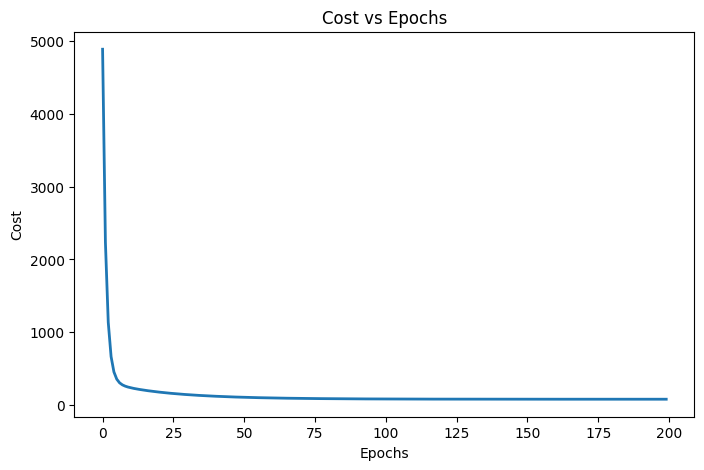

In [177]:
# Plot Cost Curve
plt.figure(figsize=(8,5))
plt.plot(cost_curve, linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Cost vs Epochs")
plt.show()

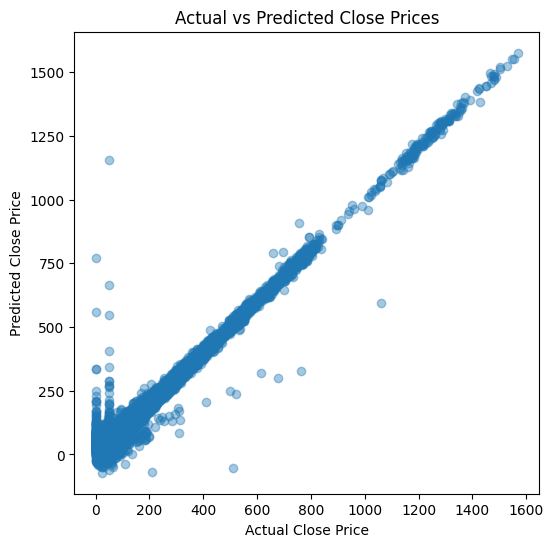

In [180]:
# Plot of actual vs predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, test_pred, alpha=0.4)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted Close Prices")
plt.show()